In [4]:
#importing a standard plotting python package
import matplotlib.pyplot as plt
#this makes the plots appear here instead of opening in a new window
%matplotlib inline

#keras were kind enough to wrap fashion_mnist for us, so we don't need to download the images ourselves
from keras.datasets import fashion_mnist

#importing numpy since we will need to for arithmetic operations
import numpy as np

In [5]:
#Load the training and testing data, X is images, y are labels
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Text(0.5,1,'sample of class number 3')

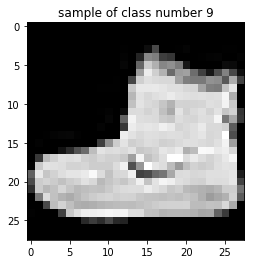

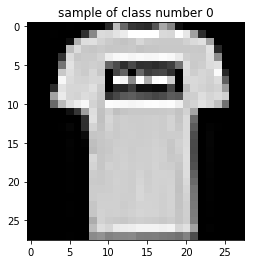

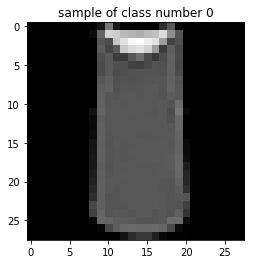

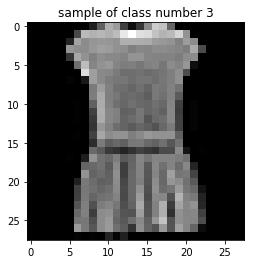

In [3]:
#lets look at some images
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.title('sample of class number {}'.format(y_train[0]))

plt.figure()
plt.imshow(X_train[1], cmap='gray')
plt.title('sample of class number {}'.format(y_train[1]))

plt.figure()
plt.imshow(X_train[2], cmap='gray')
plt.title('sample of class number {}'.format(y_train[2]))

plt.figure()
plt.imshow(X_train[3], cmap='gray')
plt.title('sample of class number {}'.format(y_train[3]))


### Normalizing the images and converting to float

In [4]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)

X_train /= 255.0
X_test /= 255.0

### taking part of the train set for validation
### Splitting X_train into X_train and X_val

In [5]:
X_train_orig = X_train
y_train_orig = y_train

print('there are {} training samples, we will take 50K for train and 10K for validation'.format(X_train.shape[0]))
X_train = X_train_orig[:50000]
y_train = y_train_orig[:50000]

X_val = X_train_orig[50000:]
y_val = y_train_orig[50000:]

there are 60000 training samples, we will take 50K for train and 10K for validation


### let's try classification with KNN

# Learnings:
## 1. reshape: if black and white images, 3 dimensions, colored, 4 dimensions



In [ ]:
#Importing the NN class from sklearn  
from sklearn.neighbors import NearestNeighbors

#KNeighborsClassifier wants us to roll each image into one long vector 
X_train_rolled = X_train.reshape(-1,28*28)
X_val_rolled = X_val.reshape(-1,28*28)

#initiating a new KNN classifier 
max_K = 10
neigh = NearestNeighbors(n_neighbors=max_K)
#"training" the classifier 
neigh.fit(X_train_rolled,y_train)

In [ ]:
# getting the closest neigherst neigbors. Here we get the distance between each sample in the validtion set to
# the five closest neighbors and also the neighbors indices in the validation set 
distances, indices = neigh.kneighbors(X_val_rolled)

In [ ]:
indices

In [9]:
#For each validation sample, we know the indices of it's 5 nn in the training set, let's see what are the labels 
#of those 5 nn
#I'm doing this with 2 loops, not the most elegant code - use list comprehension instead
y_val_pred = []
for row_ind in range(indices.shape[0]):
    cur_sample_row = []
    for col_ind in range(indices.shape[1]):
        cur_sample_row.append(y_train[indices[row_ind,col_ind]])
        
    y_val_pred.append(cur_sample_row)

In [10]:
#converting this to a numpy matrix
y_val_pred = np.array(y_val_pred)

In [11]:
#let's look at the predictions - class labels of the 10 nearest neighbours, to do voting
y_val_pred

array([[9, 9, 9, ..., 9, 9, 7],
       [2, 2, 2, ..., 2, 2, 2],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [3, 3, 3, ..., 3, 3, 3],
       [0, 0, 0, ..., 6, 0, 0],
       [5, 5, 5, ..., 5, 5, 5]], dtype=uint8)

In [12]:
#the number of neighbors is a hyper param. we'll loop over K=1,2,3,4,5
#we need to most common value in each prediction vector, for that we will use the counter class
from collections import Counter

for k in range(max_K):
    y_val_pred_for_k = y_val_pred[:,:k+1]
    
    final_prediction_vec = []
    for sample_ind in range(y_val_pred_for_k.shape[0]):
        final_prediction_vec.append(Counter(y_val_pred_for_k[sample_ind]).most_common()[0][0])
    
    final_prediction_vec = np.array(final_prediction_vec)

    #we have a final prediction for our validation set for this k, let's see what is the accuracy
    cur_acc = np.sum(final_prediction_vec==y_val)/float(len(y_val))
    print ('with k = {} our acc on the validtion is {}'.format(k+1, cur_acc))


with k = 1 our acc on the validtion is 0.8458
with k = 2 our acc on the validtion is 0.8458
with k = 3 our acc on the validtion is 0.8529
with k = 4 our acc on the validtion is 0.8548
with k = 5 our acc on the validtion is 0.8548
with k = 6 our acc on the validtion is 0.8554
with k = 7 our acc on the validtion is 0.8546
with k = 8 our acc on the validtion is 0.8538
with k = 9 our acc on the validtion is 0.8519
with k = 10 our acc on the validtion is 0.8509


### Our best k is 7, so let's try that on our test set


In [13]:
X_test_rolled = X_test.reshape(-1,28*28)
distances, indices = neigh.kneighbors(X_test_rolled)

In [14]:
y_test_pred = []
for row_ind in range(indices.shape[0]):
    cur_sample_row = []
    for col_ind in range(indices.shape[1]):
        cur_sample_row.append(y_train[indices[row_ind,col_ind]])
        
    y_test_pred.append(cur_sample_row)

#converting this to a numpy matrix
y_test_pred = np.array(y_test_pred)


In [15]:
y_test_pred_for_k = y_test_pred[:,:7+1]


final_prediction_vec = []
for sample_ind in range(y_test_pred_for_k.shape[0]):
    final_prediction_vec.append(Counter(y_test_pred_for_k[sample_ind]).most_common()[0][0])

final_prediction_vec = np.array(final_prediction_vec)

#we have a final prediction for our validation set for this k, let's see what is the accuracy
cur_acc = np.sum(final_prediction_vec==y_test)/float(len(y_test))
print ('with k = {} our acc on the test is {}'.format(k+1, cur_acc))

with k = 10 our acc on the test is 0.8496


# Let's try Linear classification 
linearSVC

In [16]:
#LinearSVC is one example of a linear model
from sklearn.svm import LinearSVC

#One of the hyperparameters of LR is C, how well to fit the training data or how much regularization do we want
# larger C, more prone to overfitting
# best practice values of C, increasing in log scale
for cur_C in [0.0001,0.0003, 0.001, 0.003, 0.01, 0.03,0.1,0.3,1.0]:
    log_reg_clf = LinearSVC(C=cur_C)
    log_reg_clf.fit(X_train_rolled,y_train) #this takes care of all the SGD and all that 
    cur_acc = log_reg_clf.score(X_val_rolled,y_val)
    print ('acc of LinearSVC with C = {} is {}'.format(cur_C, cur_acc))


acc of LinearSVC with C = 0.0001 is 0.8083
acc of LinearSVC with C = 0.0003 is 0.8271
acc of LinearSVC with C = 0.001 is 0.8417
acc of LinearSVC with C = 0.003 is 0.8484
acc of LinearSVC with C = 0.01 is 0.8528
acc of LinearSVC with C = 0.03 is 0.852
acc of LinearSVC with C = 0.1 is 0.8507
acc of LinearSVC with C = 0.3 is 0.8489
acc of LinearSVC with C = 1.0 is 0.8474


In [17]:
#The best cur is 0.01 so let's try that on the test set
log_reg_clf = LinearSVC(C=0.01)
log_reg_clf.fit(X_train_rolled,y_train) #this takes care of all the SGD and all that 
test_acc = log_reg_clf.score(X_test_rolled,y_test)
print(' logistic regression with C={} reached {} acc'.format(0.01,test_acc))

 logistic regression with C=0.01 reached 0.8405 acc


# Let's try regular fully connected NN 

In [18]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

#Keras wants one-hot vector
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train,10)
Y_val = np_utils.to_categorical(y_val,10)
Y_test = np_utils.to_categorical(y_test,10)

In [19]:
## let's start with a pretty weak model, no hidden layer, just input and output with softmax
from keras.callbacks import EarlyStopping
#let's monitor the validation loss, if the validation loss does not decrease during 4 epochs we will stop training
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1) 


nn_model1 = Sequential()
nn_model1.add(Dense(10, input_shape = (X_train_rolled.shape[1],)))
nn_model1.add(Activation('softmax'))

nn_model1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = nn_model1.fit(X_train_rolled, Y_train, batch_size=32, 
          nb_epoch=1000,verbose=1,
          validation_data=(X_val_rolled, Y_val),
          callbacks=[early_stop])

/Users/Gabrielle/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 [==============================] - 3s 53us/step - loss: 0.8614 - acc: 0.7269 - val_loss: 0.6551 - val_acc: 0.7847
Epoch 2/1000
50000/50000 [==============================] - 2s 45us/step - loss: 0.6109 - acc: 0.8009 - val_loss: 0.5816 - val_acc: 0.8042
Epoch 3/1000
50000/50000 [==============================] - 2s 45us/step - loss: 0.5569 - acc: 0.8177 - val_loss: 0.5452 - val_acc: 0.8149
Epoch 4/1000
50000/50000 [==============================] - 2s 44us/step - loss: 0.5281 - acc: 0.8252 - val_loss: 0.5237 - val_acc: 0.8209
Epoch 5/1000
50000/50000 [==============================] - 2s 44us/step - loss: 0.5094 - acc: 0.8310 - val_loss: 0.5095 - val_acc: 0.8245
Epoch 6/1000
50000/50000 [==============================] - 2s 46us/step - loss: 0.4956 - acc: 0.8342 - val_loss: 0.4968 - val_acc: 0.8276
Epoch 7/1000
50000/50000 [==============================] - 2s 44us/step - loss: 0.4850 - acc: 0.8388 - val_loss: 0.

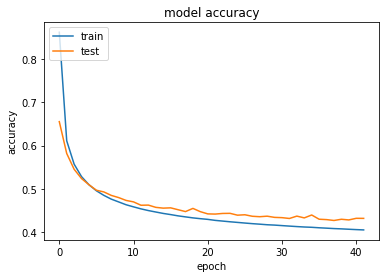

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [21]:
#we stopped training, let's calculate accuracy on the validation set
Y_pred = nn_model1.predict(X_val_rolled)
#how many correct predictions
correct_num = np.sum(Y_pred.argmax(axis=1)==y_val)
print ('acc is {}'.format(correct_num/float(len(y_val))))

acc is 0.8515


the correct class for image 1 is 9


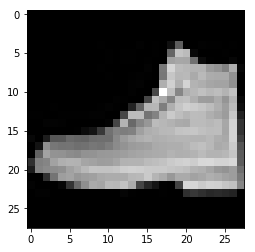

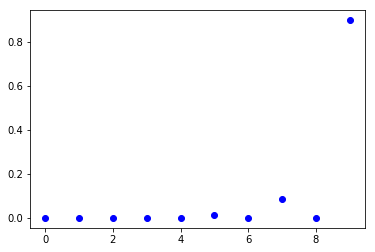

In [22]:
#prediction for image 0
plt.figure()
plt.imshow(X_val[0],cmap='gray')
plt.figure()
plt.plot(Y_pred[0],'bo')
print ( 'the correct class for image 1 is {}'.format(y_val[0]) )

the correct class for image 1 is 2


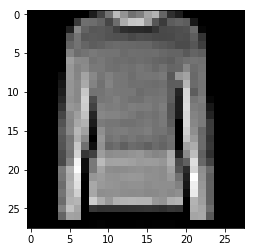

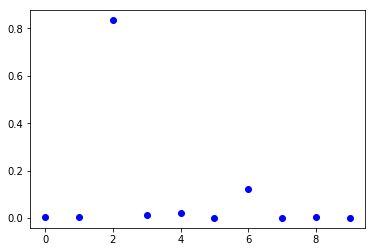

In [23]:
#prediction for image 1
plt.figure()
plt.imshow(X_val[1],cmap='gray')
plt.figure()
plt.plot(Y_pred[1],'bo')
print ( 'the correct class for image 1 is {}'.format(y_val[1]) )

In [24]:
## Let's try a more complicated model  - adding a hidden layer with 100 neurons and relu activation

#let's monitor the validation loss, if the validation loss does not decrease during 4 epochs we will stop training
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1) 


nn_model2 = Sequential()
nn_model2.add(Dense(100, input_shape = (X_train_rolled.shape[1],)))
nn_model2.add(Activation('relu'))

nn_model2.add(Dense(10))
nn_model2.add(Activation('softmax'))

nn_model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = nn_model2.fit(X_train_rolled, Y_train, batch_size=32, 
          nb_epoch=1000,verbose=1,
          validation_data=(X_val_rolled, Y_val),
          callbacks=[early_stop])

/Users/Gabrielle/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 [==============================] - 4s 77us/step - loss: 0.7910 - acc: 0.7457 - val_loss: 0.5772 - val_acc: 0.8040
Epoch 2/1000
50000/50000 [==============================] - 4s 72us/step - loss: 0.5333 - acc: 0.8204 - val_loss: 0.5111 - val_acc: 0.8178
Epoch 3/1000
50000/50000 [==============================] - 4s 72us/step - loss: 0.4847 - acc: 0.8350 - val_loss: 0.4779 - val_acc: 0.8314
Epoch 4/1000
50000/50000 [==============================] - 4s 78us/step - loss: 0.4592 - acc: 0.8413 - val_loss: 0.4645 - val_acc: 0.8368
Epoch 5/1000
50000/50000 [==============================] - 4s 75us/step - loss: 0.4422 - acc: 0.8475 - val_loss: 0.4622 - val_acc: 0.8339
Epoch 6/1000
50000/50000 [==============================] - 4s 72us/step - loss: 0.4286 - acc: 0.8510 - val_loss: 0.4391 - val_acc: 0.8437
Epoch 7/1000
50000/50000 [==============================] - 4s 73us/step - loss: 0.4164 - acc: 0.8551 - val_loss: 0.

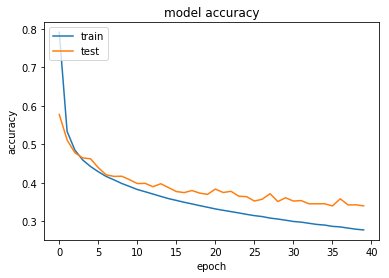

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
#we stopped training, let's calculate accuracy on the validation set
Y_pred = nn_model2.predict(X_val_rolled)
#how many correct predictions
correct_num = np.sum(Y_pred.argmax(axis=1)==y_val)
print ('acc is {}'.format(correct_num/float(len(y_val))))

acc is 0.8818


In [ ]:
## Let's try an even more complicated mode, 2 hidden layers with 512 neurons and another hidden layer with 64 neurons

#let's monitor the validation loss, if the validation loss does not decrease during 4 epochs we will stop training
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1) 


nn_model3 = Sequential()
nn_model3.add(Dense(512, input_shape = (X_train_rolled.shape[1],)))
nn_model3.add(Activation('relu'))
nn_model3.add(Dense(512, input_shape = (X_train_rolled.shape[1],)))
nn_model3.add(Activation('relu'))
nn_model3.add(Dense(64, input_shape = (X_train_rolled.shape[1],)))
nn_model3.add(Activation('relu'))


nn_model3.add(Dense(10))
nn_model3.add(Activation('softmax'))

nn_model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = nn_model3.fit(X_train_rolled, Y_train, batch_size=32, 
          nb_epoch=1000,verbose=1,
          validation_data=(X_val_rolled, Y_val),
          callbacks=[early_stop])

/Users/Gabrielle/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 [==============================] - 16s 329us/step - loss: 0.7079 - acc: 0.7650 - val_loss: 0.5354 - val_acc: 0.8113
Epoch 2/1000
50000/50000 [==============================] - 15s 297us/step - loss: 0.4716 - acc: 0.8357 - val_loss: 0.4437 - val_acc: 0.8439
Epoch 3/1000
50000/50000 [==============================] - 20s 400us/step - loss: 0.4254 - acc: 0.8512 - val_loss: 0.4671 - val_acc: 0.8357
Epoch 4/1000
50000/50000 [==============================] - 15s 301us/step - loss: 0.3959 - acc: 0.8608 - val_loss: 0.4025 - val_acc: 0.8611
Epoch 5/1000
50000/50000 [==============================] - 15s 295us/step - loss: 0.3732 - acc: 0.8685 - val_loss: 0.4232 - val_acc: 0.8474
Epoch 6/1000
50000/50000 [==============================] - 13s 261us/step - loss: 0.3563 - acc: 0.8739 - val_loss: 0.3789 - val_acc: 0.8659
Epoch 7/1000
50000/50000 [==============================] - 14s 280us/step - loss: 0.3416 - acc: 0.8784 

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
#we stopped training, let's calculate accuracy on the validation set
Y_pred = nn_model3.predict(X_val_rolled)
#how many correct predictions
correct_num = np.sum(Y_pred.argmax(axis=1)==y_val)
print ('acc is {}'.format(correct_num/float(len(y_val))))

In [ ]:
#the accuracy is worse, perhpas I overfitted

### Ensemble of the 3 NN models - Y_pred are matrices of 10k rows for each sample, of 10 columns representing the probability of the 10 classes.

In [ ]:
Y_pred1 = nn_model1.predict(X_val_rolled)
Y_pred2 = nn_model2.predict(X_val_rolled)
Y_pred3 = nn_model3.predict(X_val_rolled)


Y_ensemble = (Y_pred1 + Y_pred2 + Y_pred3)/3

In [ ]:
correct_num = np.sum(Y_ensemble.argmax(axis=1)==y_val)
print ('acc is {}'.format(correct_num/float(len(y_val))))

In [ ]:
# got a slight improvment 

## Let's try regular ConvNets


In [ ]:
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import  Flatten

print ('out data sahpe is {}'.format(X_train.shape))
print ('we need to add a dummy dimension as the last dimension')
X_train_orig = X_train.copy()
X_val_orig = X_val.copy()

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2],1)

print ('now our data shape is {}'.format(X_train.shape))

In [ ]:
#let's start with a simple convnet - one conv layer, followed by  relu operation, and then fully connected layer
conv_model1 = Sequential()
conv_model1.add(Convolution2D(20, 3, 3, # 20 filters of 3 x 3
                        border_mode='valid', # take care of padding for me
                        input_shape=(28, 28,1)))
conv_model1.add(Activation('relu'))
conv_model1.add(MaxPooling2D( pool_size = (2,2))) # kernel size 2, stride 2
conv_model1.add(Flatten())
conv_model1.add(Dense(10)) # for each class
conv_model1.add(Activation('softmax'))

conv_model1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = conv_model1.fit(X_train, Y_train, batch_size=32, 
          nb_epoch=1000,verbose=1,
          validation_data=(X_val, Y_val),
          callbacks=[early_stop])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
Y_pred = conv_model1.predict(X_val)
#how many correct predictions
correct_num = np.sum(Y_pred.argmax(axis=1)==y_val)
print ('acc is {}'.format(correct_num/float(len(y_val))))

In [ ]:
#a more complicated - one conv layer, followed by  relu operation, followed by another conv layer,
# and then fully connected layer
conv_model2 = Sequential()
conv_model2 .add(Convolution2D(20, 3, 3,
                        border_mode='valid',
                        input_shape=(28, 28,1)))
conv_model2.add(Activation('relu'))
conv_model2.add(MaxPooling2D( pool_size = (2,2)))

conv_model2 .add(Convolution2D(20, 3, 3,
                        border_mode='valid',
                        input_shape=(28, 28,1)))
conv_model2.add(Activation('relu'))
conv_model2.add(MaxPooling2D( pool_size = (2,2)))


conv_model2.add(Flatten())
conv_model2.add(Dense(10))
conv_model2.add(Activation('softmax'))

conv_model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = conv_model2.fit(X_train, Y_train, batch_size=32, 
          nb_epoch=1000,verbose=1,
          validation_data=(X_val, Y_val),
          callbacks=[early_stop])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
Y_pred = conv_model2.predict(X_val)
#how many correct predictions
correct_num = np.sum(Y_pred.argmax(axis=1)==y_val)
print ('acc is {}'.format(correct_num/float(len(y_val))))

In [ ]:
#lower acc! :( let's try to add another fc layer
conv_model3 = Sequential()
conv_model3.add(Convolution2D(20, 3, 3,
                        border_mode='valid',
                        input_shape=(28, 28,1)))
conv_model3.add(Activation('relu'))
conv_model3.add(MaxPooling2D( pool_size = (2,2)))
conv_model3.add(Flatten())
conv_model3.add(Dropout(0.5))
conv_model3.add(Dense(100))
conv_model3.add(Activation('relu'))
conv_model3.add(Dropout(0.5))
conv_model3.add(Dense(10))
conv_model3.add(Activation('softmax'))

conv_model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = conv_model3.fit(X_train, Y_train, batch_size=32, 
          nb_epoch=1000,verbose=1,
          validation_data=(X_val, Y_val),
          callbacks=[early_stop])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
Y_pred = conv_model3.predict(X_val)
#how many correct predictions
correct_num = np.sum(Y_pred.argmax(axis=1)==y_val)
print ('acc is {}'.format(correct_num/float(len(y_val))))

# Bamm! 90% acc!
# maybe we can squeeze a bit more using data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    #width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    #height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

conv_model3 = Sequential()
conv_model3.add(Convolution2D(20, 3, 3,
                        border_mode='valid',
                        input_shape=(28, 28,1)))
conv_model3.add(Activation('relu'))
conv_model3.add(MaxPooling2D( pool_size = (2,2)))
conv_model3.add(Flatten())
conv_model3.add(Dropout(0.5)) # Add droupout before dense layers becausea lot off 
conv_model3.add(Dense(100))
conv_model3.add(Activation('relu'))
conv_model3.add(Dropout(0.5))
conv_model3.add(Dense(10))
conv_model3.add(Activation('softmax'))

conv_model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = conv_model3.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), 
          nb_epoch=1000,verbose=1,
          validation_data=(X_val, Y_val),
          callbacks=[early_stop])

In [ ]:
Y_pred = conv_model3.predict(X_val)
#how many correct predictions
correct_num = np.sum(Y_pred.argmax(axis=1)==y_val)
print ('acc is {}'.format(correct_num/float(len(y_val))))

In [ ]:
# the acc is lower, strange, never mind

## Conv3 gave the best acc on val, so let's report its performance on test 

In [ ]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

Y_pred = conv_model3.predict(X_test)
#how many correct predictions
correct_num = np.sum(Y_pred.argmax(axis=1)==y_test)
print ('acc is {}'.format(correct_num/float(len(y_test))))